# Kafka generative model

Hyperparameters:
```plaintext
Hyperparameters(vocab_size=7000, n_feedforward=512, n_encoder_layer=3, n_decoder_layer=3, n_head=8, n_embd=512, dropout=0.1, bias=False, epochs=50, batch_size=64, optimizer={'lr': 0.0001, 'betas': (0.9, 0.98), 'eps': 1e-09}, scheduler={'decay_lr': True, 'warmup': 100, 'max': 5000, 'min_lr': 0.0001}, weight_decay=0.1, grad_clip=1.0, output_path='./output/', data_path='./kafka_pairs.txt', tokenizer={'path': None, 'bpe_path': None, 'k': None, 'special_symbols': {'[PAD]': 256, '[CLS]': 257, '[SEP]': 258}, 'vocab_size': 7000, 'tokenizer': None}, loss_fn=CrossEntropyLoss())
```

Transformer architecture:
```plaintext
Transformer(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (linear1): Linear(in_features=512, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=512, out_features=512, bias=True)
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (multihead_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (linear1): Linear(in_features=512, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=512, out_features=512, bias=True)
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm3): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
          (dropout3): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
  )
  (src_tok_emb): Embedding(
    (embedding): Embedding(7000, 512)
  )
  (tgt_tok_emb): Embedding(
    (embedding): Embedding(7000, 512)
  )
  (positional_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (generator): Linear(in_features=512, out_features=7000, bias=True)
)
```

Vocabulary size: 7000

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

from kafka.kafka import Kafka

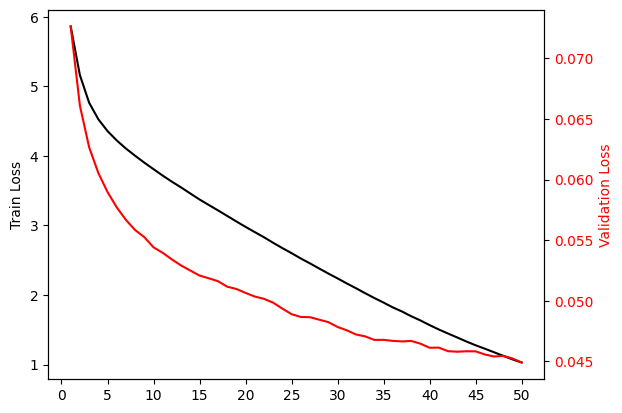

In [2]:
loss = pd.read_csv('./loss.csv', header=0, index_col=0)

fig, ax1 = plt.subplots()
ax1.plot(loss.index, loss["train_loss"], color='black')
ax1.set_ylabel('Train Loss', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(loss.index, loss["val_loss"], color='red')
ax2.set_ylabel('Validation Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(range(0, max(loss.index)+1, 5))
plt.xlabel('Epoch')
plt.show()

In [3]:
models = {
    "50": torch.load("./model-50.pth", map_location=torch.device('cpu')),
}
for model in models.values():
    model.config.device = "cpu"

In [4]:
prompts = ["I'm sorry, I didn't catch your name.",
           "My name is Hallvard, and I'm a student.",
           "Where the hell are you?",
           "KAFKA KAFKA KAFKA KAFKAESQUE"]
maximum = 200

In [5]:
for prompt in prompts:
    print(f"\n\033[91m Prompt:\033[0m {prompt}")
    for which, model in models.items():
        output = model(prompt, maximum)
        print(f"\033[91m {which}:\033[0m {output}")


 Prompt: I'm sorry, I didn't catch your name.
 50: WARDEN: But I'm so much.

 Prompt: My name is Hallvard, and I'm a student.
 50: But you would have a time for you and put it down to me, and I let you find nothing better than you.

 Prompt: Where the hell are you?
 50: He's the boy, you can see him.

 Prompt: KAFKA KAFKA KAFKA KAFKAESQUE
 50: But on the other hand he could not fall moved with much care and eat he could not fall into the very edge of the cris.
